In [11]:
# PART 1: IMPORTS AND DATA LOADING

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sentiment library
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# download VADER once (first run only)
nltk.download('vader_lexicon')

# load the CSV (change path if needed)
df = pd.read_csv("integrated_dataset.csv")

# quick checks



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [17]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [19]:
df.shape

(28372, 31)

             track_name  vader_sentiment
0  mohabbat bhi jhoothi           0.3182
1             i believe          -0.7717
2                   cry           0.8481
3              patricia           0.9854
4    apopse eida oneiro           0.9371


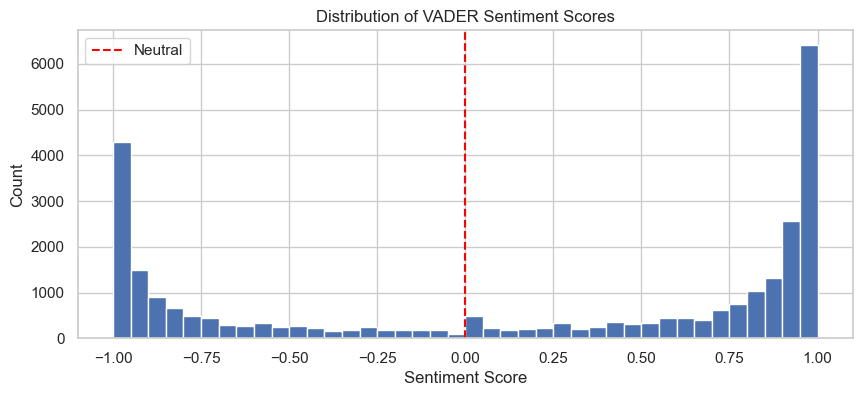

In [21]:
sia = SentimentIntensityAnalyzer()

sentiment_values = []
for text in df["lyrics"]:
    text = str(text)              # just in case of NaN
    scores = sia.polarity_scores(text)
    sentiment_values.append(scores["compound"])

df["vader_sentiment"] = sentiment_values

print(df[["track_name", "vader_sentiment"]].head())

# Histogram of VADER scores (like your distribution plot)
sns.set(style="whitegrid")

plt.figure(figsize=(10,4))
plt.hist(df["vader_sentiment"], bins=40)
plt.axvline(0, color="red", linestyle="--", label="Neutral")
plt.title("Distribution of VADER Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.legend()
plt.show()


In [23]:
# PART 3: ADD DECADE, SUCCESS FLAG, PRESTIGE FLAG
# release_date seems to be the year (e.g. 1950)

# convert year to int
df["release_date"] = df["release_date"].astype(int)

# make a decade column like 1950, 1960, ...
decade_list = []
for y in df["release_date"]:
    d = (y // 10) * 10
    decade_list.append(d)
df["decade"] = decade_list

# simple success definition:
# from your sample age is 1, so I'll treat 1 as successful
df["is_successful"] = df["age"] == 1

# very naive prestige: artist appears more than 3 times
artist_prestige = []
artist_names_list = list(df["artist_name"])

for name in df["artist_name"]:
    count = artist_names_list.count(name)
    if count > 3:
        artist_prestige.append("Prestigious")
    else:
        artist_prestige.append("Other")

df["prestige"] = artist_prestige

print(df[["artist_name", "is_successful", "prestige"]].head())


            artist_name  is_successful     prestige
0                mukesh           True        Other
1         frankie laine           True  Prestigious
2           johnnie ray           True        Other
3           pérez prado           True        Other
4  giorgos papadopoulos           True        Other


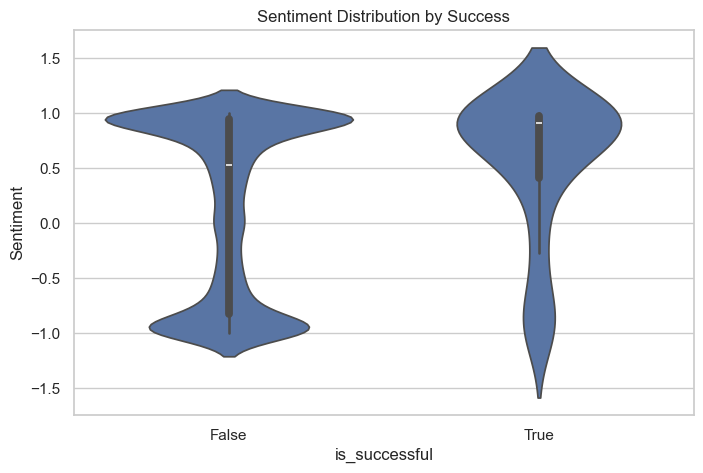

In [25]:
# SENTIMENT DISTRIBUTION BY SUCCESS (VIOLIN)

plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="is_successful", y="vader_sentiment")
plt.title("Sentiment Distribution by Success")
plt.xlabel("is_successful")
plt.ylabel("Sentiment")
plt.show()


Using columns for corr: ['vader_sentiment', 'sadness', 'romantic', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'obscene', 'feelings', 'like/girls']


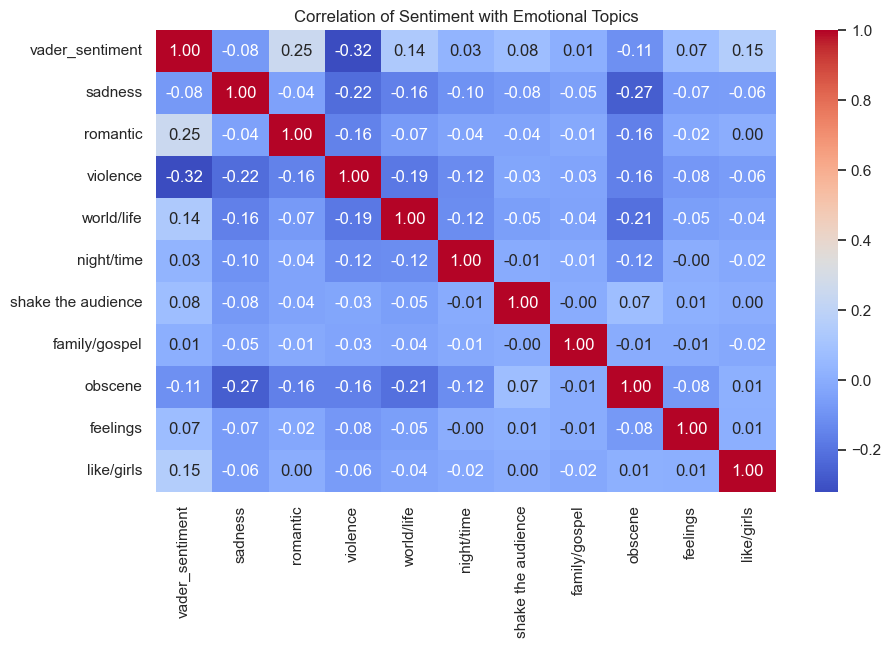

In [27]:
# PART 4: CORRELATION HEATMAP

cols_for_corr = [
    "vader_sentiment",
    "sadness",
    "romantic",
    "violence",
    "world/life",
    "night/time",
    "shake the audience",
    "family/gospel",
    "obscene",
    "feelings",
    "like/girls"
]

# keep only columns that really exist (safety check)
cols_existing = [c for c in cols_for_corr if c in df.columns]
print("Using columns for corr:", cols_existing)

corr_matrix = df[cols_existing].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation of Sentiment with Emotional Topics")
plt.show()


In [29]:
# PART 5: TEXT METRICS PER SONG (TTR, HAPAX, AVG WORD LENGTH)

import re
from collections import Counter

TTR_list = []
Hapax_list = []
AvgWordLen_list = []

for txt in df["lyrics"]:
    txt = str(txt).lower()
    # simple word split (you can make it fancier if you want)
    words = re.findall(r"[a-zA-Z]+", txt)
    total_words = len(words)

    if total_words == 0:
        TTR_list.append(0)
        Hapax_list.append(0)
        AvgWordLen_list.append(0)
        continue

    # unique words
    unique_words = len(set(words))

    # frequency of each word
    freq = Counter(words)

    hapax_count = 0
    for w in freq:
        if freq[w] == 1:
            hapax_count += 1

    # average word length
    total_len = 0
    for w in words:
        total_len += len(w)
    avg_len = total_len / total_words

    TTR_list.append(unique_words / total_words)
    Hapax_list.append(hapax_count / total_words)
    AvgWordLen_list.append(avg_len)

df["TTR"] = TTR_list
df["Hapax"] = Hapax_list
df["AvgWordLength"] = AvgWordLen_list

print(df[["track_name","TTR","Hapax","AvgWordLength"]].head())


             track_name       TTR     Hapax  AvgWordLength
0  mohabbat bhi jhoothi  0.378947  0.084211       4.505263
1             i believe  0.705882  0.647059       5.215686
2                   cry  0.958333  0.916667       5.416667
3              patricia  0.611111  0.222222       4.833333
4    apopse eida oneiro  0.416667  0.145833       4.708333


In [31]:
# PART 6: GROUP BY DECADE FOR LEXICAL METRICS

decades_sorted = sorted(df["decade"].unique())

decade_avg_TTR = []
decade_avg_Hapax = []
decade_avg_AWL = []

for d in decades_sorted:
    sub = df[df["decade"] == d]
    decade_avg_TTR.append(sub["TTR"].mean())
    decade_avg_Hapax.append(sub["Hapax"].mean())
    decade_avg_AWL.append(sub["AvgWordLength"].mean())

print("Decades:", decades_sorted)
print("Avg TTR:", decade_avg_TTR)
print("Avg Hapax:", decade_avg_Hapax)
print("Avg AWL:", decade_avg_AWL)


Decades: [1950, 1960, 1970, 1980, 1990, 2000, 2010]
Avg TTR: [0.6031892900782132, 0.5832919134402365, 0.5726090778753156, 0.577949411353435, 0.592147648545596, 0.5811911554317564, 0.5722473649828931]
Avg Hapax: [0.41093082436726713, 0.4057640691724906, 0.40424474660705023, 0.4141624086577253, 0.4280857276529052, 0.4161040232447971, 0.4115069083610842]
Avg AWL: [5.140045377181151, 5.05807808391671, 5.090043898063092, 5.121141452203416, 5.141058389447911, 5.134723628951776, 5.115087638651671]


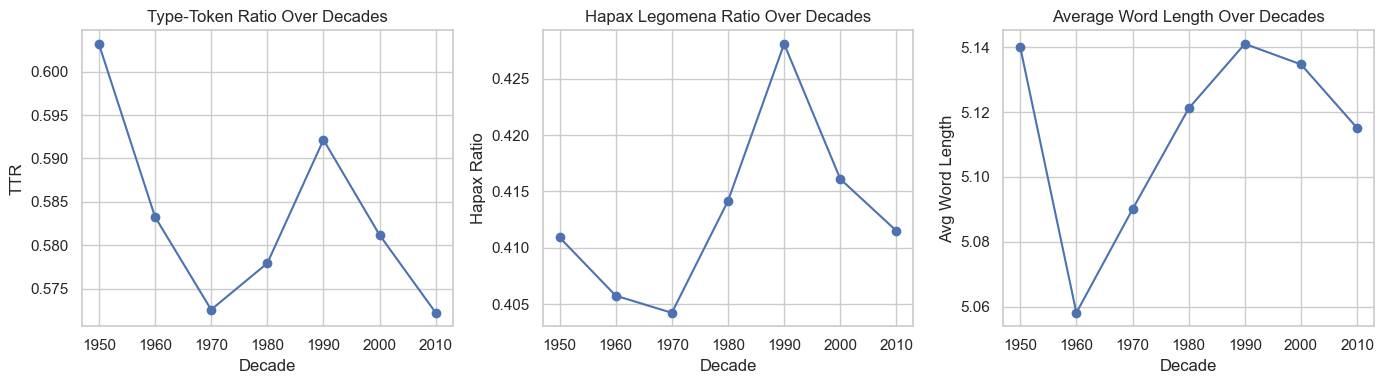

In [33]:
# LEXICAL METRICS PLOTS (3 PANELS)

fig, axes = plt.subplots(1, 3, figsize=(14,4), sharex=True)

# TTR plot
axes[0].plot(decades_sorted, decade_avg_TTR, marker='o')
axes[0].set_title("Type-Token Ratio Over Decades")
axes[0].set_xlabel("Decade")
axes[0].set_ylabel("TTR")

# Hapax plot
axes[1].plot(decades_sorted, decade_avg_Hapax, marker='o')
axes[1].set_title("Hapax Legomena Ratio Over Decades")
axes[1].set_xlabel("Decade")
axes[1].set_ylabel("Hapax Ratio")

# Avg word length plot
axes[2].plot(decades_sorted, decade_avg_AWL, marker='o')
axes[2].set_title("Average Word Length Over Decades")
axes[2].set_xlabel("Decade")
axes[2].set_ylabel("Avg Word Length")

plt.tight_layout()
plt.show()


In [43]:
import os
from docx import Document

title = "📊 Decoding the Soundtrack of Society — README"
content = """
# 📊 Decoding the Soundtrack of Society  
### Analyzing Cultural & Emotional Patterns in Music Lyrics Using NLP  

This project investigates how song lyrics reflect cultural, emotional, and linguistic trends across time and genre. Using NLP and statistical analysis, we uncover correlations between genre, sentiment, vocabulary complexity, emotional themes, and audience bias.

---

## 🔍 Project Objectives
- Quantify genre trends  
- Decode linguistic shifts  
- Connect lyrical art to historical context  
- Highlight genre-dependent thematic nuances  

---

## 🧠 Methodology (Core Explanation)

### 1️⃣ Data Acquisition  
- Source dataset includes ~50 years of English song lyrics with metadata  
- Raw data contains artist, track name, lyrics, genre, sentiment metrics, etc.  

### 2️⃣ Preprocessing of Lyrics  
- Lowercasing  
- Removal of punctuation, digits, special characters  
- Stopword elimination  
- Lemmatization / stemming  
- Tokenization  

### 3️⃣ Thematic Scoring & Feature Extraction  
- Sentiment extraction using VADER  
- Topic modeling & grouping into emotional categories  
- Genre-to-theme statistical correlation  

### 4️⃣ Genre Correlation & Visualization  
- Linear correlation  
- Theme cross-distribution  
- Genre-based metric comparisons  

### 5️⃣ Bias Detection & Mitigation (Hypothesis 2)  
- Prestige bias analysis  
- Success bias analysis  
- Sentiment regression and percentile balancing  

### 6️⃣ Language Complexity Metrics  
- Type-Token Ratio  
- Hapax Legomena Ratio  
- Average word length analysis across decades  

---

## 🗂 Project Structure  

README.md  
NLP.pdf  
v1.ipynb  
Untitled.ipynb  
data/  
images/  

---

## ▶️ Running the Project  

### Install Dependencies
pip install -r requirements.txt

### Run Notebook
jupyter notebook

---

## 🧰 Technologies Used  
- Python  
- Jupyter Notebook  
- Pandas / NumPy  
- NLTK / spaCy  
- VADER sentiment analyzer  
- Matplotlib / Seaborn  
- Scikit-learn  

---

## 📄 Conclusions & Inferences  
Stored separately in NLP.pdf.

---

## ✍️ Author  
Prasanna Dengale  
LinkedIn: https://www.linkedin.com/in/prasanna-dengale-07c  
GitHub: https://github.com/D-Prasanna  
"""

doc = Document()
doc.add_heading(title, level=1)
for line in content.split("\n"):
    doc.add_paragraph(line)
    
filepath = "D:/"
doc.save(filepath)
filepath


PermissionError: [Errno 13] Permission denied: 'D:/'

In [45]:
from docx import Document

title = "📊 Decoding the Soundtrack of Society — README"

content = """
# 📊 Decoding the Soundtrack of Society
### Analyzing Cultural & Emotional Patterns in Music Lyrics Using NLP

This project investigates how song lyrics reflect cultural, emotional, and linguistic trends across time and genre. Using NLP and statistical analysis, we uncover correlations between genre, sentiment, vocabulary complexity, emotional themes, and audience bias.

---

## 🔍 Project Objectives
- Quantify genre trends
- Decode linguistic shifts
- Connect lyrical art to historical context
- Highlight genre-dependent thematic nuances

---

## 🧠 Methodology (Core Explanation)

### 1️⃣ Data Acquisition
- Source dataset includes ~50 years of English song lyrics with metadata
- Raw data contains artist, track name, lyrics, genre, sentiment metrics, etc.

### 2️⃣ Preprocessing of Lyrics
- Lowercasing
- Removal of punctuation, digits, special characters
- Stopword elimination
- Lemmatization / stemming
- Tokenization

### 3️⃣ Thematic Scoring & Feature Extraction
- Sentiment extraction using VADER
- Topic modeling & grouping into emotional categories
- Genre-to-theme statistical correlation

### 4️⃣ Genre Correlation & Visualization
- Linear correlation
- Theme cross-distribution
- Genre-based metric comparisons

### 5️⃣ Bias Detection & Mitigation (Hypothesis 2)
- Prestige bias analysis
- Success bias analysis
- Sentiment regression and percentile balancing

### 6️⃣ Language Complexity Metrics
- Type-Token Ratio
- Hapax Legomena Ratio
- Average word length analysis across decades

---

## 🗂 Project Structure

- README.md  
- NLP.pdf  
- v1.ipynb  
- Untitled.ipynb  
- data/  
- images/

---

## ▶️ Running the Project

### Install Dependencies
- pip install -r requirements.txt

### Run Notebook
- jupyter notebook

---

## 🧰 Technologies Used
- Python
- Jupyter Notebook
- Pandas / NumPy
- NLTK / spaCy
- VADER sentiment analyzer
- Matplotlib / Seaborn
- Scikit-learn

---

## 📄 Conclusions & Inferences
Stored separately in NLP.pdf.

---

## ✍️ Author
Prasanna Dengale
LinkedIn: https://www.linkedin.com/in/prasanna-dengale-07c
GitHub: https://github.com/D-Prasanna
"""

doc = Document()
doc.add_heading(title, level=1)

for line in content.split("\n"):
    doc.add_paragraph(line)

doc.save("README_Project_Documentation.docx")
print("Document saved as README_Project_Documentation.docx")


Document saved as README_Project_Documentation.docx
